<a href="https://colab.research.google.com/github/SAMAWELJABALLI/TweetsSentimentAnalysis/blob/main/Decision_Trees_Tunisian_Dialect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**THE DECISION TREES MODEL ON TUNISIAN DIALECT**

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc, accuracy_score
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import seaborn as sns
from tqdm import tqdm
import os



# Loading saved vectors 

In [ ]:
# loading bow vectors
X_train_bow = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_bow","rb"))
X_test_bow = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_bow","rb"))
bow_features = pickle.load(open("/content/drive/MyDrive/saved_feats/bow_features","rb")).tolist()
print('shape of X_train_bow is {}'.format(X_train_bow.shape))
print('shape of X_test_bow is {}'.format(X_test_bow.shape))


#loading tfidf vectors
X_train_tfidf = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_tfidf","rb"))
X_test_tfidf = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_tfidf","rb"))
tfidf_features = pickle.load(open("/content/drive/MyDrive/saved_feats/tfidf_features","rb")).tolist()
print('shape of X_train_tfidf is {}'.format(X_train_tfidf.shape))
print('shape of X_test_tfidf is {}'.format(X_test_tfidf.shape))


w2v_words = pickle.load(open("/content/drive/MyDrive/saved_feats/w2v_words","rb")).tolist()
#avgw2v
X_train_avgw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_avgw2v","rb"))
X_test_avgw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_avgw2v","rb"))
print('shape of X_train_avgw2v is {}'.format(X_train_avgw2v.shape))
print('shape of X_test_avgw2v is {}'.format(X_test_avgw2v.shape))

'''#tfidf-w2v
X_train_tfw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_tfw2v","rb"))
X_test_tfw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_tfw2v","rb"))
print('shape of X_train_tfw2v is {}'.format(X_train_tfw2v.shape))
print('shape of X_test_tfw2v is {}'.format(X_test_tfw2v.shape))

'''
y_train = np.load('/content/drive/MyDrive/saved_feats/y_train.npy',allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/saved_feats/y_test.npy',allow_pickle=True)
print(f'shape of y_train is {y_train.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train_bow is (139367, 144497)
shape of X_test_bow is (59730, 144497)
shape of X_train_tfidf is (139367, 144497)
shape of X_test_tfidf is (59730, 144497)
shape of X_train_avgw2v is (139367, 50)
shape of X_test_avgw2v is (59730, 50)
shape of y_train is (139367,)
shape of y_test is (59730,)


# helper function to plot confusion matrix

In [ ]:
# helper function to plot confusion matrix
def plot_confusion_matrixes(model,x_train,y_train,x_test,y_test):
    cm_train = confusion_matrix(y_train,model.predict(x_train))
    cm_test =  confusion_matrix(y_test,model.predict(x_test))
    class_label = ["negative", "positive"]
    df_train = pd.DataFrame(cm_train, index = class_label, columns = class_label)
    df_test = pd.DataFrame(cm_test, index = class_label, columns = class_label)
    f, axes = plt.subplots(1, 2,figsize=(12,4))

    for i in range(2):
      df = df_train if i==0 else df_test
      sns.heatmap(df, annot = True, fmt = "from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc, accuracy_score
d",ax=axes[i])
      axes[i].set_title(f"Confusion Matrix - {'Train' if i==0 else 'Test'}")
      axes[i].set_xlabel("Predicted Label")
      axes[i].set_ylabel("True Label")
    plt.show()

# **Decision Trees**
## Decision Trees on BagOfWords Features


Model with best parameters :
 {'max_depth': 1000, 'min_samples_split': 500}


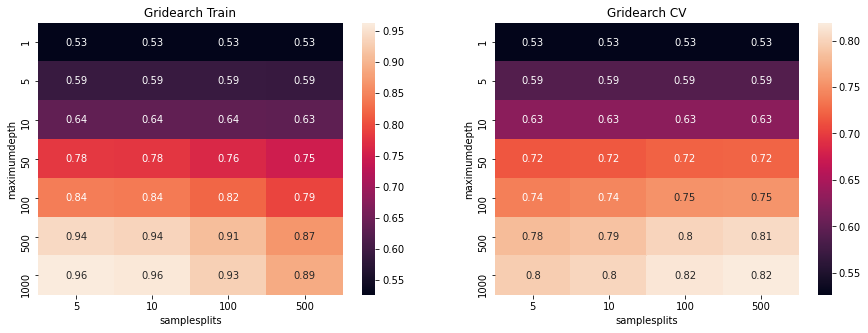

In [ ]:
clf = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_bow,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,4)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,4)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=samplesplits,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_ylabel("maximumdepth")
  axes[i].set_xlabel("samplesplits")


plt.show()

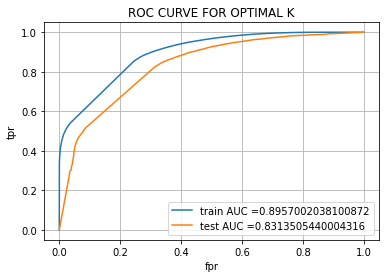

Area under train roc 0.8957002038100872
Area under test roc 0.8313505440004316


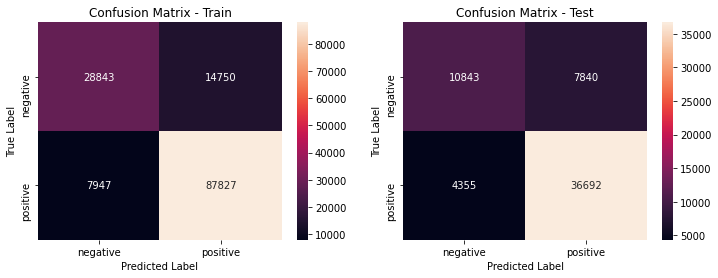


-----classification report on train data on Bag of words Features-----

              precision    recall  f1-score   support

           0       0.78      0.66      0.72     43593
           1       0.86      0.92      0.89     95774

    accuracy                           0.84    139367
   macro avg       0.82      0.79      0.80    139367
weighted avg       0.83      0.84      0.83    139367


-----classification report on validation data on Bag of words Features-----

              precision    recall  f1-score   support

           0       0.71      0.58      0.64     18683
           1       0.82      0.89      0.86     41047

    accuracy                           0.80     59730
   macro avg       0.77      0.74      0.75     59730
weighted avg       0.79      0.80      0.79     59730



In [7]:
best_est = DecisionTreeClassifier(**model.best_params_)
best_est = best_est.fit(X_train_bow,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test_bow)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))
plot_confusion_matrixes(best_est,X_train_bow,y_train,X_test_bow,y_test)


#classification report on train data
print('\n-----classification report on train data on Bag of words Features-----\n')
print(classification_report(y_train, model.predict(X_train_bow)))

#classification report on validation data
print('\n-----classification report on validation data on Bag of words Features-----\n')
print(classification_report(y_test, model.predict(X_test_bow)))

# Decision Trees on TFIDF Features

Model with best parameters :
 {'max_depth': 1000, 'min_samples_split': 500}


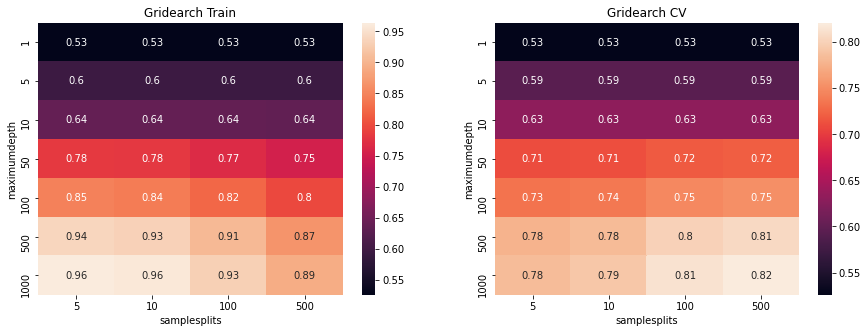

CPU times: user 1min 32s, sys: 1.44 s, total: 1min 33s
Wall time: 34min 31s


In [8]:
%%time
clf = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_tfidf,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,4)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,4)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=samplesplits,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_ylabel("maximumdepth")
  axes[i].set_xlabel("samplesplits")


plt.show()

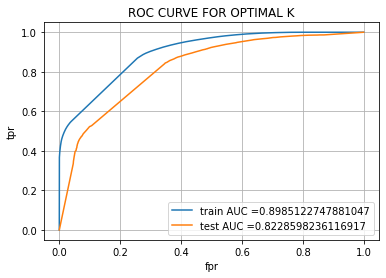

Area under train roc 0.8985122747881047
Area under test roc 0.8228598236116917


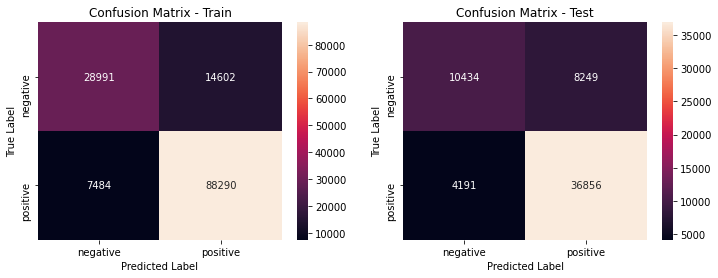


-----classification report on train data on TFIDF Features-----

              precision    recall  f1-score   support

           0       0.80      0.66      0.72     43593
           1       0.86      0.92      0.89     95774

    accuracy                           0.84    139367
   macro avg       0.83      0.79      0.81    139367
weighted avg       0.84      0.84      0.84    139367


-----classification report on validation data on TFIDF Features-----

              precision    recall  f1-score   support

           0       0.72      0.56      0.63     18683
           1       0.82      0.90      0.86     41047

    accuracy                           0.79     59730
   macro avg       0.77      0.73      0.74     59730
weighted avg       0.79      0.79      0.78     59730



In [9]:
best_est = DecisionTreeClassifier(**model.best_params_)
best_est = best_est.fit(X_train_tfidf,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test_tfidf)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))
plot_confusion_matrixes(best_est,X_train_tfidf,y_train,X_test_tfidf,y_test)

#classification report on train data
print('\n-----classification report on train data on TFIDF Features-----\n')
print(classification_report(y_train, model.predict(X_train_tfidf)))

#classification report on validation data
print('\n-----classification report on validation data on TFIDF Features-----\n')
print(classification_report(y_test, model.predict(X_test_tfidf)))

# Decision Tree On AvgWord2Vec Features


Model with best parameters :
 {'max_depth': 50, 'min_samples_split': 500}


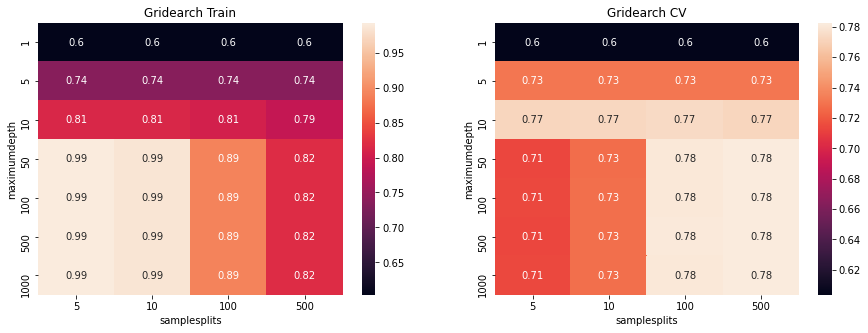

CPU times: user 16.6 s, sys: 434 ms, total: 17 s
Wall time: 7min 1s


In [10]:
%%time
clf = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_avgw2v,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,4)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,4)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=samplesplits,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_ylabel("maximumdepth")
  axes[i].set_xlabel("samplesplits")

plt.show()

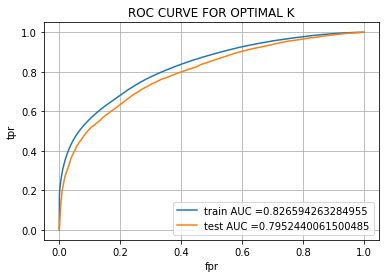

Area under train roc 0.826594263284955
Area under test roc 0.7952440061500485


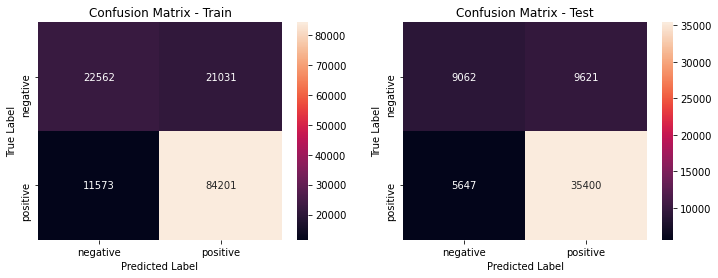


-----classification report on train data on AVG WORD2VEC Features-----

              precision    recall  f1-score   support

           0       0.66      0.52      0.58     43593
           1       0.80      0.88      0.84     95774

    accuracy                           0.77    139367
   macro avg       0.73      0.70      0.71    139367
weighted avg       0.76      0.77      0.76    139367


-----classification report on validation data on AVG WORD2VEC Features-----

              precision    recall  f1-score   support

           0       0.62      0.49      0.54     18683
           1       0.79      0.86      0.82     41047

    accuracy                           0.74     59730
   macro avg       0.70      0.67      0.68     59730
weighted avg       0.73      0.74      0.74     59730



In [11]:
best_est = DecisionTreeClassifier(**model.best_params_)
best_est = best_est.fit(X_train_avgw2v,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train_avgw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test_avgw2v)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


plot_confusion_matrixes(best_est,X_train_avgw2v,y_train,X_test_avgw2v,y_test)

#classification report on train data
print('\n-----classification report on train data on AVG WORD2VEC Features-----\n')
print(classification_report(y_train, model.predict(X_train_avgw2v)))

#classification report on validation data
print('\n-----classification report on validation data on AVG WORD2VEC Features-----\n')
print(classification_report(y_test, model.predict(X_test_avgw2v)))


# **Observations and Conclusions**



In [16]:
from prettytable import PrettyTable
z = PrettyTable()
z.field_names = ["Vector","Algorithm","Hyperparam-min_sample_splits","Hyperparam-max_Depth","Train AUC", "Test AUC","Train accuracy", "Test accuracy"]
z.add_row(["bow","decision_tree",500,1000, 0.8957002038100872,0.8313505440004316,0.84,0.80])
z.add_row(["tfidf","decision_tree",500,1000,0.8985122747881047, 0.8228598236116917,0.84,0.79 ])
z.add_row(["avgw2v","decision_tree",500,50, 0.826594263284955,0.7952440061500485,0.77,0.74])
#z.add_row(["tfidfw2v","decision_tree",500,10,0.7986216813232861,0.7865140140091872])
print(z)


+--------+---------------+------------------------------+----------------------+--------------------+--------------------+----------------+---------------+
| Vector |   Algorithm   | Hyperparam-min_sample_splits | Hyperparam-max_Depth |     Train AUC      |      Test AUC      | Train accuracy | Test accuracy |
+--------+---------------+------------------------------+----------------------+--------------------+--------------------+----------------+---------------+
|  bow   | decision_tree |             500              |         1000         | 0.8957002038100872 | 0.8313505440004316 |      0.84      |      0.8      |
| tfidf  | decision_tree |             500              |         1000         | 0.8985122747881047 | 0.8228598236116917 |      0.84      |      0.79     |
| avgw2v | decision_tree |             500              |          50          | 0.826594263284955  | 0.7952440061500485 |      0.77      |      0.74     |
+--------+---------------+------------------------------+-------

* Performance of decision trees are lower compared to logistic regression,naive bayes and SVM.
* We can get better results by using ensembeling techniques like bagging and boosting on decision trees.
* We could also try post-pruning methods such as cost complexity pruning which helps to avoid overfitting. Since we are using random forest next,we are not trying that.

